# Per-Layer Heatmap

In [1]:
map_model_names = {
    "internvl3-8b": "InternVL3",
    "qwen2-vl-7b": "Qwen2-VL",
    "llava-next-interleave-7b": "LLaVA-Interleave",
    "llava-onevision-7b": "LLaVA-OneVision",
    "paligemma2-10b": "Paligemma 2",
}

## Plots 

In [ ]:
import json
from pathlib import Path
from typing import Dict

output_dir = "../output"
#model_name = "llava-next-interleave-7b"
#model_name = "llava-onevision-7b"
model_name = "qwen2-vl-7b"
#model_name = "internvl3-8b"
#model_name = "paligemma2-10b"
summary_path = Path(output_dir) / model_name / "per-layer-analysis" / "summary.json"

with open(summary_path, "r") as f:
    summary = json.load(f)

unique_keys = sorted({k.split("_layer")[0] for k in summary.keys()}, reverse=True)

results: Dict[int, Dict[str, float]] = {}
for key, value in summary.items():
    if "_layer_" not in key:
        results[0] = {
                "SVM_mean_encoder": value["accuracy"],
            }
        
        results[0].update(
            {
                k: 0.0 for k in unique_keys if "encoder" not in k
            }
        )
    else:
        layer = int(key.split("_layer_")[1])
        method = key.split("_layer_")[0]

        if layer not in results:
            results[layer] = {
                k: 0.0 for k in unique_keys
            }

        results[layer][method] = value["accuracy"]

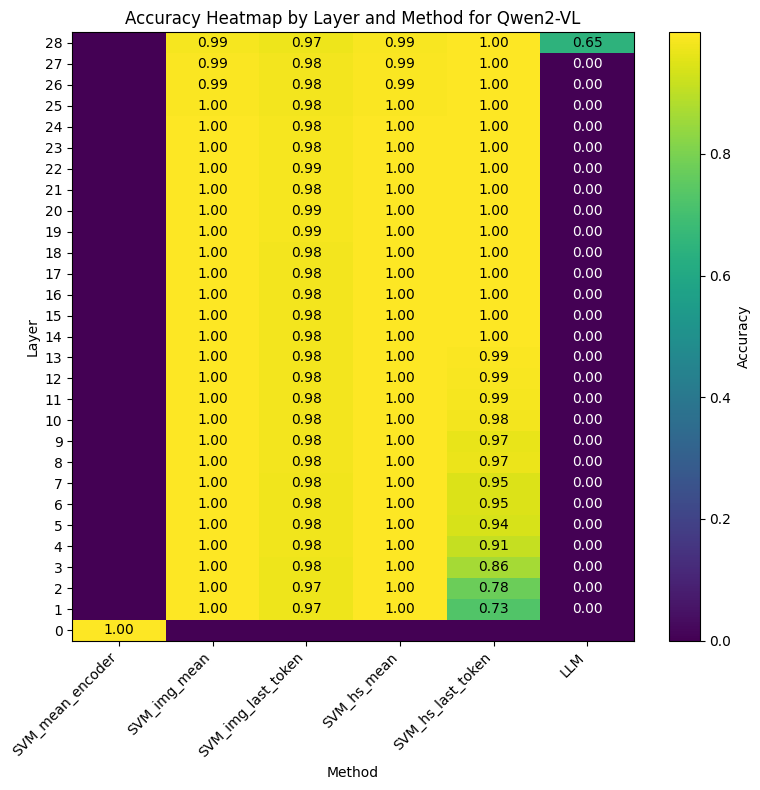

In [16]:
import numpy as np
import matplotlib.pyplot as plt

layers = sorted(results.keys(), reverse=True)
methods = unique_keys
data = [[results[layer][method] for method in methods] for layer in layers]

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(data, aspect='auto', cmap='viridis')

# Set axis labels
ax.set_xticks(np.arange(len(methods)))
ax.set_yticks(np.arange(len(layers)))
ax.set_xticklabels(methods, rotation=45, ha='right')
ax.set_yticklabels(layers)
ax.set_xlabel('Method')
ax.set_ylabel('Layer')
ax.set_title(f'Accuracy Heatmap by Layer and Method for {map_model_names.get(model_name, model_name)}')

# Annotate each cell with the accuracy value
for i in range(len(layers)):
    for j in range(len(methods)):
        if i < len(data) - 1 and j == 0:
            continue
        if i == len(data) - 1 and j != 0:
            continue
        ax.text(j, i, f"{data[i][j]:.2f}", ha='center', va='center', color='w' if data[i][j] < 0.5 else 'black')

fig.colorbar(im, ax=ax, label='Accuracy')
plt.tight_layout()
plt.savefig(summary_path.parent / "accuracy_heatmap.png")

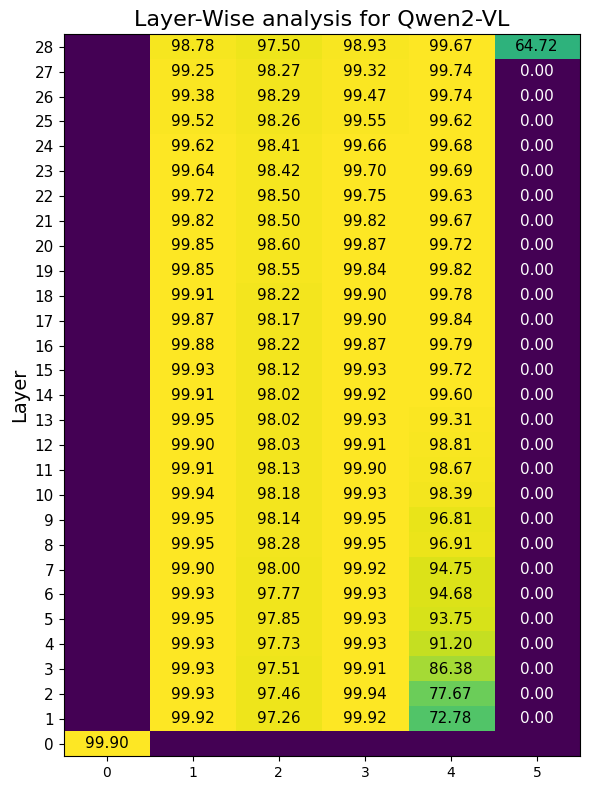

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

layers = sorted(results.keys(), reverse=True)
methods = unique_keys
data = [[results[layer][method]*100 for method in methods] for layer in layers]

fig, ax = plt.subplots(figsize=(6, 8))
im = ax.imshow(data, aspect='auto', cmap='viridis')

# Set axis labels
ax.set_xticks(np.arange(len(methods)))
ax.set_yticks(np.arange(len(layers)))
#ax.set_xticklabels(methods, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(layers, fontsize=11)
ax.set_ylabel('Layer', fontsize=14)
ax.set_title(f'Layer-Wise analysis for {map_model_names.get(model_name, model_name)}', fontsize=16)

# Annotate each cell with the accuracy value
for i in range(len(layers)):
    for j in range(len(methods)):
        if i < len(data) - 1 and j == 0:
            continue
        if i == len(data) - 1 and j != 0:
            continue
        ax.text(j, i, f"{data[i][j]:.2f}", ha='center', va='center', fontsize=11, color='w' if data[i][j] < 50 else 'black')

plt.tight_layout()
plt.savefig(summary_path.parent / "layer-wise_analysis.pdf")

## STD

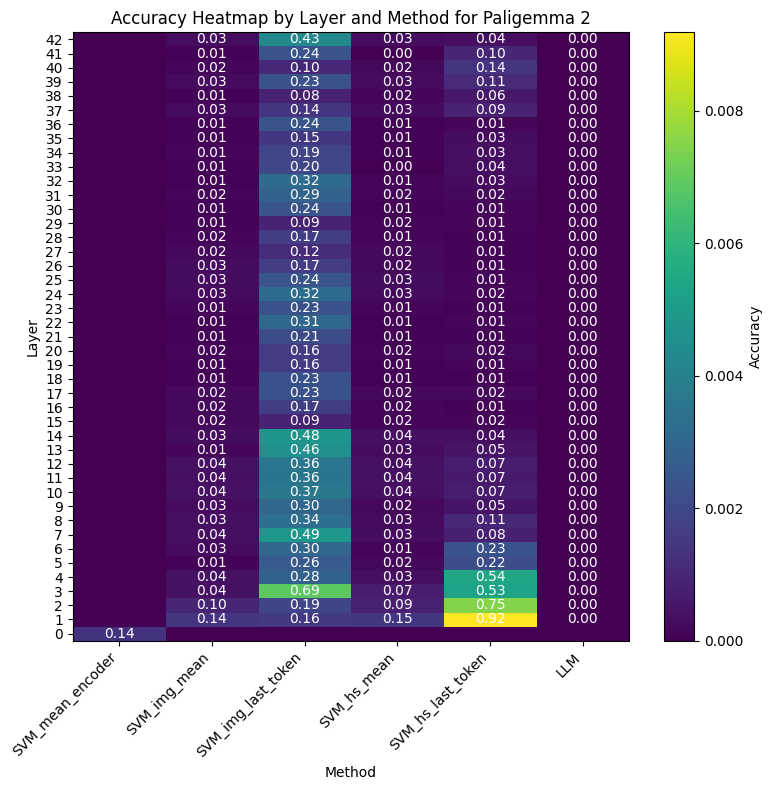

In [8]:
import json
from pathlib import Path
from typing import Dict

import numpy as np
import matplotlib.pyplot as plt


output_dir = "../output"
#model_name = "llava-next-interleave-7b"
#model_name = "llava-onevision-7b"
#model_name = "qwen2-vl-7b"
#model_name = "internvl3-8b"
model_name = "paligemma2-10b"
summary_path = Path(output_dir) / model_name / "per-layer-analysis" / "summary.json"

with open(summary_path, "r") as f:
    summary = json.load(f)

unique_keys = sorted({k.split("_layer")[0] for k in summary.keys()}, reverse=True)

results: Dict[int, Dict[str, float]] = {}
for key, value in summary.items():
    if "_layer_" not in key:
        results[0] = {
                "SVM_mean_encoder": value["std"],
            }
        
        results[0].update(
            {
                k: 0.0 for k in unique_keys if "encoder" not in k
            }
        )
    else:
        layer = int(key.split("_layer_")[1])
        method = key.split("_layer_")[0]

        if layer not in results:
            results[layer] = {
                k: 0.0 for k in unique_keys
            }
            #results[layer]["SVM_mean_encoder"] = results[0]["SVM_mean_encoder"]

        results[layer][method] = value["std"]

layers = sorted(results.keys(), reverse=True)
methods = unique_keys
data = [[results[layer][method] for method in methods] for layer in layers]

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(data, aspect='auto', cmap='viridis')

# Set axis labels
ax.set_xticks(np.arange(len(methods)))
ax.set_yticks(np.arange(len(layers)))
ax.set_xticklabels(methods, rotation=45, ha='right')
ax.set_yticklabels(layers)
ax.set_xlabel('Method')
ax.set_ylabel('Layer')
ax.set_title(f'Accuracy Heatmap by Layer and Method for {map_model_names.get(model_name, model_name)}')

# Annotate each cell with the accuracy value
for i in range(len(layers)):
    for j in range(len(methods)):
        if i < len(data) - 1 and j == 0:
            continue
        if i == len(data) - 1 and j != 0:
            continue
        ax.text(j, i, f"{data[i][j]*100:.2f}", ha='center', va='center', color='w' if data[i][j] < 50 else 'black')

fig.colorbar(im, ax=ax, label='Accuracy')
plt.tight_layout()
plt.show()